In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
TARGET = '07-avg-100-auc-acm_final_test-gpu/aucs.csv'
#TARGET = '08-avg-100-auc-flickr-cpu/aucs.csv'
#TARGET = '08-avg-100-auc-flickr-cpu/possib-mistakes/aucs2.csv'

In [3]:
df = pd.read_csv(TARGET, names=['Source', 'Alpha', 'AUC', 'CumulativeTime'])
print(df)

             Source  Alpha       AUC  CumulativeTime
0    acm_test_final    0.0  0.500000             NaN
1    acm_test_final    0.0  0.491702             NaN
2    acm_test_final    0.0  0.500000             NaN
3    acm_test_final    0.0  0.471663             NaN
4    acm_test_final    0.0  0.498721             NaN
..              ...    ...       ...             ...
105  acm_test_final    1.0  0.750921             NaN
106  acm_test_final    1.0  0.840343             NaN
107  acm_test_final    1.0  0.793051             NaN
108  acm_test_final    1.0  0.832388             NaN
109  acm_test_final    1.0  0.808282             NaN

[110 rows x 4 columns]


In [4]:
by_src_alpha = df.groupby(by=['Source', 'Alpha'])
desc = by_src_alpha.describe()
desc

AUC                                                    \
                     count      mean       std       min       25%       50%   
Source         Alpha                                                           
acm_test_final 0.0    10.0  0.495693  0.008886  0.471663  0.496121  0.499795   
               0.1    10.0  0.841990  0.034128  0.786894  0.811936  0.856710   
               0.2    10.0  0.850580  0.028397  0.785073  0.837932  0.855039   
               0.3    10.0  0.844633  0.020337  0.797890  0.837885  0.842649   
               0.4    10.0  0.824093  0.022657  0.784916  0.818977  0.821957   
               0.5    10.0  0.817446  0.034073  0.757547  0.798783  0.813809   
               0.6    10.0  0.838557  0.023173  0.805451  0.823497  0.838032   
               0.7    10.0  0.809472  0.031970  0.761469  0.795793  0.803104   
               0.8    10.0  0.822723  0.018230  0.785445  0.815013  0.823756   
               0.9    10.0  0.815722  0.033310  0.751036  0.799672  0.823963   
               1.0    10.0  0.801270  0.036272  0.730897  0.789944  0.811986   

                                         CumulativeTime                       \
                           75%       max          count mean std min 25% 50%   
Source         Alpha                                                           
acm_test_final 0.0    0.500000  0.500000            0.0  NaN NaN NaN NaN NaN   
               0.1    0.860260  0.876752            0.0  NaN NaN NaN NaN NaN   
               0.2    0.869129  0.882007            0.0  NaN NaN NaN NaN NaN   
               0.3    0.858308  0.869299            0.0  NaN NaN NaN NaN NaN   
               0.4    0.835497  0.867596            0.0  NaN NaN NaN NaN NaN   
               0.5    0.839751  0.872172            0.0  NaN NaN NaN NaN NaN   
               0.6    0.855176  0.870344            0.0  NaN NaN NaN NaN NaN   
               0.7    0.836497  0.853104            0.0  NaN NaN NaN NaN NaN   
               0.8    0.833249  0.849074            0.0  NaN NaN NaN NaN NaN   
               0.9    0.839771  0.860930            0.0  NaN NaN NaN NaN NaN   
               1.0    0.828675  0.840343            0.0  NaN NaN NaN NaN NaN   

                              
                     75% max  
Source         Alpha          
acm_test_final 0.0   NaN NaN  
               0.1   NaN NaN  
               0.2   NaN NaN  
               0.3   NaN NaN  
               0.4   NaN NaN  
               0.5   NaN NaN  
               0.6   NaN NaN  
               0.7   NaN NaN  
               0.8   NaN NaN  
               0.9   NaN NaN  
               1.0   NaN NaN

No handles with labels found to put in legend.


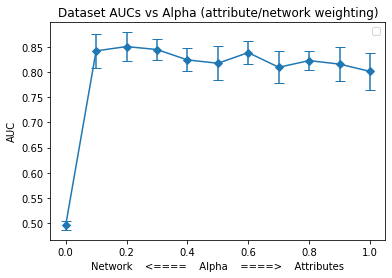

In [5]:
alphas = [i[1] for i in desc.index]
aucs = desc[('AUC',  'mean')]
stds = desc[('AUC',  'std')]

plt.errorbar(x=alphas, y=aucs, yerr=stds, capsize=5, marker='D')
plt.xlabel('Network    <====    Alpha    ====>    Attributes')
plt.ylabel('AUC')
plt.title('Dataset AUCs vs Alpha (attribute/network weighting)')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()